In [34]:
import numpy as np
import pandas as pd
import datetime as dt



### Copiando la data de los ultimos 18 meses, hasta 3 meses antes de la pandemia

In [6]:
data = pd.read_csv('2021VAERSData.csv', encoding='latin1')
data2 = pd.read_csv('2020VAERSData.csv', encoding='latin1')

alldata= pd.concat([data, data2])

/home/andygon/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,12,15,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/andygon/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,12,15,23,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
dead = alldata[alldata.DIED == "Y"]
over75 = dead[dead.AGE_YRS >=75]

### Empezando con lo mas simple, es la corta estadia en los hopitales para la gente con vacuna. Compara eso con las casi 2+ semanas para los no vacunados que logran sobrevivir

<Figure size 1080x576 with 0 Axes>

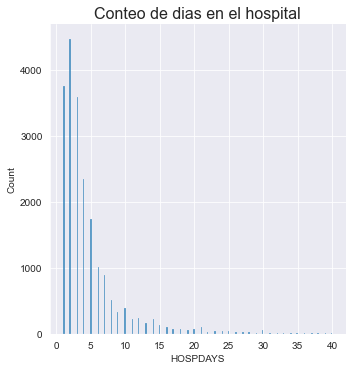

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.displot(alldata.HOSPDAYS[alldata.HOSPDAYS <=40])
plt.title('Conteo de dias en el hospital', size=16)
plt.show()

#### Los que reportan, la mayoria lo reporta el dia despues de la vacuna, lo cual esta en acuerdo con los efectos el dia despues de la vacuna que le da a mucha gente pero que es normal

<Figure size 1080x576 with 0 Axes>

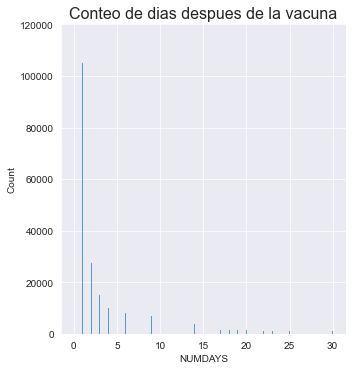

In [285]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.displot(alldata.NUMDAYS[alldata.NUMDAYS <=30])
plt.title('Conteo de dias despues de la vacuna', size=16)
plt.ylim(0,120000)
plt.show()

In [9]:
print("The number of ER visits was {} out of {} reports".format(str(len(alldata.ER_VISIT[alldata.ER_VISIT == "Y"])), str(len(alldata))))
print("The number reported as dead for 2020 and 2021 is "+str(len(dead)))
print("The number reported as dead for 2020 and 2021 over 75 yrs old "+str(len(over75)))
print("Percentage of reports were of death "+str(len(dead)/len(alldata)*100), "%")
print("Percentage of vaccinated dead "+str(f"{(len(dead)/178000000)*100:.7f}"), "%")

The number of ER visits was 226 out of 562224 reports
The number reported as dead for 2020 and 2021 is 6651
The number reported as dead for 2020 and 2021 over 75 yrs old 3059
Percentage of reports were of death 1.1829804490736788 %
Percentage of vaccinated dead 0.0035758 %


### De las 186 millones de personas vacunadas en EEUU:
<br>
<br>

##### - Solo hay 562 mil reportes VOLUNTARIOS, osea, sin chequeos medicos y cualquiera puede someter reporte sin controles
<br>

##### - Solo hay 226 que necesitaron visitas al ER, comparado con ICUs llenas de pacientes con COVID
<br>

##### - Los numeros reportados muertos SIN ESTABLECER CORRELACION A LA VACUNA en la data son 6651. De los cuales 3000+ estan por encima de la edad considerada expectativa/promedio de vida
<br>

##### - El numeros de muertos sin establecer correlacion a la vacuna en la data representan el 0.0036% de los vacunados en este pais.

In [10]:
pd.set_option('display.max_columns', None)
data2.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,855017,01/01/2020,HI,55.0,55.0,NaN,F,NaN,Symptoms occurred almost immediately- aching j...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/30/2019,12/30/2019,0.0,None,MIL,NaN,Loristan,None,Migraines,NaN,NaN,2,01/01/2020,NaN,NaN,NaN,Morphine
1,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/30/2019,12/30/2019,0.0,Same day 12/30/2019. No tests other than routi...,PHM,NaN,"levothyroxine, multi vitamin, calcium.",None,"Hypothyroidism, Meniere's Disease.",NaN,NaN,2,01/01/2020,NaN,Y,Y,"Penicillin, sulfa drugs, erythromycin, tetracy..."
2,855019,01/01/2020,NaN,50.0,50.0,NaN,F,NaN,SORENESS IN THE AREA. ITCHING AND RASH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/23/2019,12/29/2019,6.0,NaN,UNK,NaN,NaN,NaN,NaN,NaN,NaN,2,01/01/2020,NaN,NaN,NaN,NaN
3,855020,01/01/2020,TX,67.0,67.0,NaN,F,NaN,"sore arm, fever 101 , chills, and aching musc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/01/2019,01/01/2020,31.0,none,PHM,NaN,"multi vitamin, calcium, premarin cream",none,none,NaN,NaN,2,01/01/2020,NaN,NaN,NaN,"morphine,"
4,855021,01/01/2020,NaN,73.0,73.0,NaN,F,NaN,Patient presented to Clinic today 1/1/2020. Sh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2019,12/31/2019,0.0,Temp 99.7 here in clinic. Vital signs WNL othe...,PHM,NaN,NaN,NaN,NaN,NaN,NaN,2,01/01/2020,NaN,Y,NaN,NaN


In [315]:
alldata.OTHER_MEDS.replace(["none", "unknown", "Unknown", "No", "NONE", "no", "UNKNOWN", "None.",
                           "N/a", "None reported", "Multivitamin", "Vitamin D", "na", "none known",
                           "none reported", "NO", "UNK", "None known", "not known", "Vitamins",
                           "multivitamin", "Multi vitamin", "VITAMINS NOS", "Prenatal vitamins",
                           "PRENATAL VITAMINS [MINERALS NOS;VITAMINS NOS]", "Na", "Not known", "0",
                           "Multivitamins", "Nothing", "Multi-vitamin", "Denies", "advil", "Ibuprofen",
                           "TYLENOL", "Tylenol", "Mirena IUD", "vitamins", "ibuprofen", "tylenol", 
                           "unk", "Vitamin C", "Melatonin", "NONE REPORTED", "Unknown.", "none listed",
                           "denies", "multi-vitamins", "Aspiring", "No.", "multi-vitamin", "Advil", 
                           "IBUPROFEN", "no medications", "multi vitamin", "Vitamin D3", "vitamin D", 
                           "prenatal vitamins", "Daily vitamin", "BABY ASPIRIN", "No medications", 
                            "Aspirin", "NOT KNOWN", "NONE KNOWN", "unkown", "None listed", 
                            "Daily multivitamin", "Acetaminophen", "prenatal vitamin", "Not reported",
                           "multivitamins", "nothing", "?", "Prenatal vitamin", "Prenatal Vitamins",
                           "Prenatal", ";", "Multi Vitamin", "Aleve", "MULTIVITAMINS [VITAMINS NOS]",
                            "None Known", "Unk", "none.", "NKA", "no known",'Vit D',  "None noted", "Non",
                            "Multi vitamins", "Prenatal Vitamin", "Unkown", "PRENATAL VITAMINS [ASCORBIC ACID;BETACAROTENE;CALCIUM SULFATE;COLECALCIFEROL;CYANOCOBALAMIN;FERROUS",
                           "ASPIRIN [ACETYLSALICYLIC ACID]", "Vitamin d", "IUD", "None Reported",
                           "ASPIRIN (E.C.)", "not available", "None reported.", "none noted", "NONE.",
                           "VITAMIN D [COLECALCIFEROL]"], None, inplace=True)

alldata.OTHER_MEDS.replace(["LISINOPRIL","lisinopril"], "Lisinopril", inplace=True)
alldata.OTHER_MEDS.replace("INSULIN", "Insulin", inplace=True)
alldata.OTHER_MEDS.replace(["Birth control", "birth control", "Birth control pills", 
                            "birth control pills", "Birth control pill", "birth control pill"], "Birth Control", inplace=True)
alldata.OTHER_MEDS.replace(["STERILE DILUENT", "MERCK STERILE DILUENT", "sterile diluent", "Sterile diluent"], "Sterile Diluent", inplace=True)
alldata.OTHER_MEDS.replace(["LEVOTHYROXINE", "levothyroxine"], "Levothyroxine", inplace=True)
alldata.OTHER_MEDS.replace(["SYNTHROID", "synthroid"], "Synthroid", inplace=True)
alldata.OTHER_MEDS.replace(["ZYRTEC", "zyrtec"], "Zyrtec", inplace=True)
alldata.OTHER_MEDS.replace(["LEXAPRO", "lexapro"], "Lexapro", inplace=True)
alldata.OTHER_MEDS.replace(["OMEPRAZOLE", "omeprazole"], "Omeprazole", inplace=True)
alldata.OTHER_MEDS.replace(["METFORMIN", "metformin"], "Metformin", inplace=True)
alldata.OTHER_MEDS.replace(["ZOLOFT", "zoloft"], "Zoloft", inplace=True)
alldata.OTHER_MEDS.replace(["ELIQUIS", "eliquis"], "Eliquis", inplace=True)
alldata.OTHER_MEDS.replace(["ADDERALL", "adderall"], "Adderall", inplace=True)
alldata.OTHER_MEDS.replace(["METOPROLOL", "metoprolol"], "Metoprolol", inplace=True)
alldata.OTHER_MEDS.replace(["LOSARTAN", "losartan"], "Losartan", inplace=True)
alldata.OTHER_MEDS.replace(["AMLODIPINE", "amlodipine"], "Amlodipine", inplace=True)
alldata.OTHER_MEDS.replace(["LIPITOR", "lipitor"], "Lipitor", inplace=True)


alldata.OTHER_MEDS.value_counts(dropna=False).head(100)

NaN                                  241110
None                                  37273
Birth Control                          1516
Levothyroxine                          1322
Synthroid                              1076
Sterile Diluent                         787
Lisinopril                              714
Zyrtec                                  679
Lexapro                                 471
Zoloft                                  445
Metformin                               420
Omeprazole                              389
Adderall                                333
Losartan                                322
Amlodipine                              293
GARDASIL 9 SYRINGE (DEVICE)             264
Metoprolol                              242
Claritin                                240
Insulin                                 229
Sertraline                              221
Eliquis                                 197
Yes                                     181
Allegra                         

In [278]:
pd.set_option('display.max_rows', 120)
alldata.NUMDAYS[alldata.NUMDAYS <=2].value_counts(dropna=False).sum()

360319

In [30]:
alldata.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS
count,5.622240e+05,505311.000000,463318.000000,4451.000000,21104.000000,501701.000000,562224.000000
mean,1.209837e+06,48.973838,48.613039,0.249584,14.735216,23.276864,1.997426
std,2.178164e+05,19.286049,19.434402,0.256689,973.490150,621.720686,0.050666
min,8.550170e+05,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.021917e+06,34.000000,34.000000,0.000000,2.000000,0.000000,2.000000
50%,1.196470e+06,50.000000,49.000000,0.200000,3.000000,1.000000,2.000000
75%,1.378387e+06,64.000000,64.000000,0.400000,5.000000,4.000000,2.000000
max,1.640753e+06,119.000000,120.000000,1.000000,99999.000000,44195.000000,2.000000


In [280]:
alldata.CUR_ILL.replace("Slight cold", "Common Cold", inplace=True)

alldata.CUR_ILL.value_counts(dropna=False).head(10)
    

NaN                   345928
None                  129499
Seasonal Allergies      1502
Hypertension            1190
Diabetes                1001
Asthma                   992
Sinus Infection          706
UTI                      653
Migraine                 653
COVID-19                 522
Name: CUR_ILL, dtype: int64

In [ ]:
dead = alldata[alldata.DIED == "Y"]
over75 = dead[dead.AGE_YRS >=75]

In [ ]:
print("The number of ER visits was {} out of {} reports".format(str(len(alldata.ER_VISIT[alldata.ER_VISIT == "Y"])), str(len(alldata))))
# print("The number of ER visits was "+str(len(alldata.ER_VISIT[alldata.ER_VISIT == "Y"]))+str("out of ")+str(len(alldata)+str("reports")))
print("The number reported as dead for 2020 and 2021 is "+str(len(dead)))
print("The number reported as dead for 2020 and 2021 over 75 yrs old "+str(len(over75)))

In [ ]:
alldata.HOSPITAL.value_counts()

In [ ]:
import seaborn as sns

sns.distplot(alldata.HOSPDAYS[alldata.HOSPDAYS <=40]);

In [ ]:
dead.AGE_YRS.value_counts(dropna=False, bins=20)

In [ ]:
print("Percentage of reports were of death "+str(len(dead)/len(alldata)*100), "%")

print("Percentage of vaccinated dead "+str(f"{(len(dead)/186000000)*100:.7f}"), "%")

In [ ]:
372/2

In [ ]:
6651/186000000

In [ ]:
https://www.openvaers.com/covid-data

In [ ]:
https://vaers.hhs.gov/data/datasets.html?

In [ ]:
https://www.google.com/search?channel=fs&client=ubuntu&q=how+many+people+has+covid+killed+in+tthe+us

In [ ]:
https://www.politifact.com/factchecks/2021/sep/02/pramila-jayapal/whats-average-cost-covid-19-hospital-stay/

In [ ]:
https://www.macrotrends.net/countries/USA/united-states/birth-rate

In [ ]:
https://www.e-bmc.co.uk/

In [ ]:
https://en.wikipedia.org/wiki/Pierre_Kory